In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# data loading
# chunk_size = 1000
# chunks=[]
# for chunk in  pd.read_csv('weth.csv',chunksize=chunk_size):
#     chunks.append(chunk.sample(frac=0.001 ))
# df=pd.concat(chunks, axis=0)


In [60]:
df=pd.read_csv('./data/weth001.csv',parse_dates=['date'])

df['year']=df.date.dt.year
df['month']=df.date.dt.month

df.head(2)


,Unnamed: 0,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,...,rhum,msl,wdsp,wddir,sun,vis,clht,clamt,year,month
0,1282128,Dublin,DUBLIN AIRPORT,53.428,-6.241,1990-06-03 09:00:00,0.0,12.1,9.1,5.6,...,65,1004.8,17,280,0.6,40000,60,5,1990,6
1,3988124,Clare,SHANNON AIRPORT,52.690,-8.918,1990-03-23 14:00:00,0.0,10.6,8.8,6.8,...,77,1016.5,18,230,0.1,25000.0,22.0,7.0,1990,3


In [61]:

df=df.apply(lambda x: x.replace(' ',np.nan))

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator,MissingIndicator,IterativeImputer,MissingIndicator

dtypes={'rain':float,'temp':float,'wetb':float,'dewpt':float,

        'vappr':float,'rhum':float,'msl':float,
        'wdsp':float,'wddir':float}#,'sun':float,'vis':float,'clht':float,'clamt':float}

df=df.astype(dtypes)

df=df.select_dtypes(include=['number'])

df=df.drop(columns=['Unnamed: 0','latitude','longitude'])
it=IterativeImputer()
df=pd.DataFrame(it.fit_transform(df),columns=df.columns)

#im=SimpleImputer(strategy='most_frequent')
#imputed=im.fit_transform(dfo)
#dfo=pd.DataFrame(imputed,columns=dfo.columns)



In [62]:
df=df.drop(['rain','msl','wdsp','wddir','vappr'],axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46607 entries, 0 to 46606
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    46607 non-null  float64
 1   wetb    46607 non-null  float64
 2   dewpt   46607 non-null  float64
 3   rhum    46607 non-null  float64
 4   year    46607 non-null  float64
 5   month   46607 non-null  float64
dtypes: float64(6)
memory usage: 2.1 MB


In [63]:
import pandas as pd
from tpot import TPOTClassifier
from sklearn.model_selection import train_test_split


df = df.apply(lambda x: x.replace(' ', np.nan))
#df=df.fillna(df.mean(), inplace=True)
df=df.dropna()

X = df.drop(columns=['temp'])
y = df['temp']

if y.isnull().sum() > 0:
    raise ValueError("Target column contains missing values.")


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT
tpot = TPOTClassifier(verbosity=2, generations=5, population_size=20, random_state=42)

# Fit TPOT
tpot.fit(X_train, y_train)

# Export the best model
tpot.export('best_model.py')

# Evaluate the model
print(tpot.score(X_test, y_test))

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -inf


ValueError: Unknown label type: (array([ 3.2       ,  3.3       ,  3.4       ,  3.5       ,  3.6       ,
        3.7       ,  3.8       ,  3.9       ,  4.        ,  4.1       ,
        4.2       ,  4.3       ,  4.4       ,  4.5       ,  4.6       ,
        4.7       ,  4.8       ,  4.9       ,  5.        ,  5.1       ,
        5.2       ,  5.3       ,  5.4       ,  5.5       ,  5.6       ,
        5.7       ,  5.8       ,  5.9       ,  6.        ,  6.1       ,
        6.2       ,  6.3       ,  6.4       ,  6.5       ,  6.6       ,
        6.7       ,  6.8       ,  6.9       ,  7.        ,  7.1       ,
        7.2       ,  7.3       ,  7.4       ,  7.5       ,  7.6       ,
        7.68767245,  7.7       ,  7.8       ,  7.81977574,  7.81993489,
        7.88284242,  7.9       ,  7.9867588 ,  8.        ,  8.1       ,
        8.2       ,  8.2108862 ,  8.3       ,  8.3925199 ,  8.4       ,
        8.4282128 ,  8.49536428,  8.5       ,  8.54421041,  8.58848929,
        8.6       ,  8.7       ,  8.78468742,  8.8       ,  8.85968714,
        8.9       ,  9.        ,  9.1       ,  9.2       ,  9.3       ,
        9.39258495,  9.4       ,  9.5       ,  9.6       ,  9.63060582,
        9.7       ,  9.79594417,  9.8       ,  9.83444398,  9.84026751,
        9.84063914,  9.86021277,  9.86156758,  9.87598735,  9.87717462,
        9.88634368,  9.89200443,  9.89201909,  9.89607471,  9.89753769,
        9.89783821,  9.89856997,  9.89906461,  9.89947538,  9.9       ,
        9.90144327,  9.90207534,  9.90215574,  9.90238614,  9.90254397,
        9.9036266 ,  9.90398664,  9.90425951,  9.90434205,  9.90494139,
        9.90515597,  9.90557185,  9.90583779,  9.90634431,  9.9063806 ,
        9.90657125,  9.90694038,  9.90697477,  9.90713607,  9.90754992,
        9.90759116,  9.9078611 ,  9.90799469,  9.90814756,  9.90890521,
        9.90897876,  9.90909043,  9.9091265 ,  9.9092505 ,  9.90925327,
        9.90978984,  9.90990637,  9.91003329,  9.91041459,  9.91094211,
        9.91106557,  9.9111221 ,  9.91112557,  9.91137275,  9.91140217,
        9.91286861,  9.91299084,  9.91337907,  9.91341344,  9.91367613,
        9.913949  ,  9.91425794,  9.91426311,  9.91513585,  9.91536775,
        9.9164289 ,  9.91682577,  9.91708654,  9.91820823,  9.9183611 ,
        9.91877645,  9.91905998,  9.91944991,  9.91949979,  9.91993443,
        9.920475  ,  9.92069506,  9.92078618,  9.92084618,  9.92163447,
        9.92187275,  9.92190563,  9.92190957,  9.92194192,  9.92206021,
        9.9221291 ,  9.92229557,  9.92239014,  9.92254968,  9.92311273,
        9.92329496,  9.92331309,  9.92402842,  9.92450777,  9.9246794 ,
        9.92555641,  9.92558646,  9.92630755,  9.9264876 ,  9.92725884,
        9.92746884,  9.92861664,  9.92869811,  9.92870327,  9.92888672,
        9.92924554,  9.92949156,  9.92977333,  9.92989508,  9.92995678,
        9.93001338,  9.93037443,  9.93120737,  9.93493717,  9.93509888,
        9.93553699,  9.93574469,  9.93703279,  9.93775884,  9.93825694,
        9.93877203,  9.93955346,  9.93999326,  9.94013921,  9.94136065,
        9.94151671,  9.9423754 ,  9.94360003,  9.94393163,  9.94619156,
        9.94682926,  9.94701512,  9.94752932,  9.95065674,  9.95173532,
        9.95261605,  9.95262452,  9.95276546,  9.95305069,  9.95315886,
        9.95319977,  9.95501864,  9.95552214,  9.95590882,  9.95639094,
        9.9571643 ,  9.95880645,  9.95928857,  9.9613174 ,  9.96170408,
        9.96257288,  9.96295956,  9.96348475,  9.9650619 ,  9.96610038,
        9.96624979,  9.9674483 ,  9.96749934,  9.96885025,  9.97252124,
        9.97580555,  9.9783165 ,  9.97998839,  9.98163226,  9.98411175,
        9.9867998 ,  9.99067427,  9.99546957,  9.99655603, 10.        ,
       10.03072981, 10.1       , 10.15055501, 10.19401742, 10.2       ,
       10.25525062, 10.3       , 10.4       , 10.5       , 10.55916075,
       10.6       , 10.7       , 10.74152468, 10.8       , 10.9       ,
       11.        , 11.1       , 11.18298132, 11.2       , 11.3       ,
       11.4       , 11.44945555, 11.5       , 11.6       , 11.64900335,
       11.7       , 11.8       , 11.9       , 11.92023981, 12.        ,
       12.08760584, 12.1       , 12.2       , 12.3       , 12.39113555,
       12.4       , 12.5       , 12.6       , 12.7       , 12.8       ,
       12.8439451 , 12.9       , 13.        , 13.1       , 13.2       ,
       13.3       , 13.4       , 13.5       , 13.6       , 13.7       ,
       13.8       , 13.9       , 14.        , 14.1       , 14.2       ,
       14.3       , 14.4       , 14.4828433 , 14.5       , 14.6       ,
       14.7       , 14.8       , 14.9       , 15.        , 15.1       ,
       15.2       , 15.3       , 15.4       , 15.5       , 15.6       ,
       15.7       , 15.8       , 15.9       , 16.        , 16.1       ,
       16.2       , 16.3       , 16.4       , 16.5       , 16.6       ,
       16.7       , 16.8       , 16.9       , 17.        , 17.1       ,
       17.2       , 17.3       , 17.4       , 17.5       , 17.6       ,
       17.7       , 17.8       , 17.9       , 18.        , 18.1       ,
       18.2       , 18.3       , 18.4       , 18.5       , 18.6       ,
       18.7       , 18.8       , 18.9       , 19.        , 19.1       ,
       19.2       , 19.3       , 19.4       , 19.5       , 19.6       ,
       19.7       , 19.8       , 19.9       , 20.        , 20.1       ,
       20.2       , 20.3       , 20.4       , 20.5       , 20.6       ,
       20.7       , 20.8       , 20.9       , 21.        , 21.1       ,
       21.2       , 21.3       , 21.4       , 21.5       , 21.6       ,
       21.7       , 21.8       , 21.9       , 22.        , 22.1       ,
       22.2       , 22.3       , 22.4       , 22.5       , 22.6       ,
       22.7       , 22.8       , 22.9       , 23.        , 23.1       ,
       23.2       , 23.3       , 23.4       , 23.5       , 23.6       ,
       23.7       , 23.8       , 23.9       , 24.        , 24.1       ,
       24.2       , 24.3       , 24.4       , 24.5       , 24.6       ,
       24.7       , 24.9       , 25.        , 25.1       , 25.2       ,
       25.4       , 25.5       , 25.6       , 25.9       , 26.        ,
       26.1       , 26.2       , 26.4       , 26.5       , 27.        ,
       27.6       , 28.        , 28.1       , 28.5       , 28.6       ,
       29.9       ]),)

In [35]:
from sklearn.model_selection import train_test_split
y=df['temp']
X=df.drop('temp',axis=1)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=42)
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor as gbr
from sklearn.feature_selection import SelectKBest,mutual_info_classif,mutual_info_regression
from sklearn.metrics   import f1_score
from sklearn.metrics import mean_squared_error



gb=gbr(n_estimators=100)

f1_score_list=[]
for k in range(1,9):
    selector=SelectKBest(mutual_info_regression,k=k)
    selector.fit(X_train,y_train)
    
    sel_x_train=selector.transform(X_train)
    sel_x_test=selector.transform(X_test)
    gb.fit(sel_x_train,y_train)
    kbest=gb.predict(sel_x_test)
    f1_score_list.append(round(mean_squared_error(y_test,kbest),3))
    


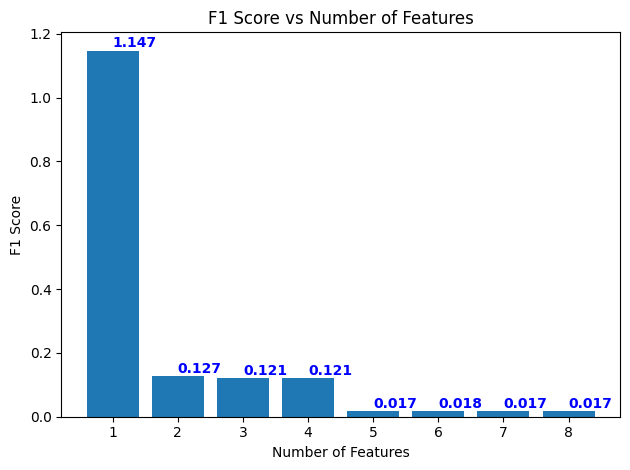

Index(['wetb', 'vappr'], dtype='object')

In [36]:

fig,ax= plt.subplots()
x=np.arange(1,9)
y=f1_score_list
ax.bar(x,y)
ax.set_xlabel('Number of Features')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs Number of Features')

for i , v in enumerate(y):
    plt.text(i+1,v+.01,str(v),color='blue',fontweight='bold')
plt.tight_layout()


plt.show()


selector=SelectKBest(mutual_info_regression,k=2)
selector.fit(X_train,y_train)
selector_mask=selector.get_support()
X_train.columns[selector_mask]  

In [37]:
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error

rfe_mse=[]
for k in range(1,9):
    rfe=RFE(gb,n_features_to_select=k,step=1)
    rfe.fit(X_train,y_train)
    sel_x_train3=rfe.transform(X_train)
    sel_x_test3=rfe.transform(X_test)
    gb.fit(sel_x_train3,y_train)
    rfe_pred=gb.predict(sel_x_test3)
    rfe_mse.append(mean_squared_error(y_test,rfe_pred))
    
    rfe_mask=rfe.support_
    print(X_train.columns[rfe_mask])
    print(rfe_mse)


Index(['wetb'], dtype='object')
[1.1471067086857396]
Index(['wetb', 'rhum'], dtype='object')
[1.1471067086857396, 0.0198378919446919]
Index(['wetb', 'dewpt', 'rhum'], dtype='object')
[1.1471067086857396, 0.0198378919446919, 0.016728243797825632]
Index(['wetb', 'dewpt', 'vappr', 'rhum'], dtype='object')
[1.1471067086857396, 0.0198378919446919, 0.016728243797825632, 0.016349629836541965]
Index(['wetb', 'dewpt', 'vappr', 'rhum', 'wddir'], dtype='object')
[1.1471067086857396, 0.0198378919446919, 0.016728243797825632, 0.016349629836541965, 0.016746836589542312]
Index(['wetb', 'dewpt', 'vappr', 'rhum', 'year', 'month'], dtype='object')
[1.1471067086857396, 0.0198378919446919, 0.016728243797825632, 0.016349629836541965, 0.016746836589542312, 0.017507205425962197]
Index(['wetb', 'dewpt', 'vappr', 'rhum', 'wddir', 'year', 'month'], dtype='object')
[1.1471067086857396, 0.0198378919446919, 0.016728243797825632, 0.016349629836541965, 0.016746836589542312, 0.017507205425962197, 0.01799652024662016]

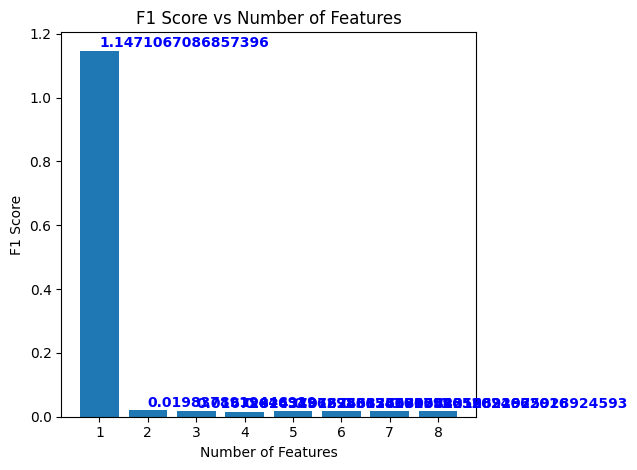

In [38]:

fig,ax= plt.subplots()
x=np.arange(1,9)
y=rfe_mse
ax.bar(x,y)
ax.set_xlabel('Number of Features')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs Number of Features')

for i , v in enumerate(y):
    plt.text(i+1,v+.01,str(v),color='blue',fontweight='bold')
plt.tight_layout()


plt.show()

In [39]:
df=df.apply(lambda x: x.replace(' ',np.nan))


from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,KNNImputer,MissingIndicator,MissingIndicator,IterativeImputer,MissingIndicator


dtypes={'rain':float,'temp':float,'wetb':float,'dewpt':float,

        'vappr':float,'rhum':float,'msl':float,
        'wdsp':float,'wddir':float}#,'sun':float,'vis':float,'clht':float,'clamt':float}
df=df.astype(dtypes)

dfn=df.select_dtypes(include=['number'])

dfo=df.select_dtypes(include=[object]).drop(['sun','vis','clht','clamt'],axis=1)
df_na=df[['sun','vis','clht','clamt']]
it=IterativeImputer()
dfn=pd.DataFrame(it.fit_transform(dfn),columns=dfn.columns)

im=SimpleImputer(strategy='most_frequent')
imputed=im.fit_transform(dfo)
dfo=pd.DataFrame(imputed,columns=dfo.columns)


print(dfo.isnull().sum())
print(dfn.isnull().sum())
print(df_na.isnull().sum())

# for column in df.columns:
#     df[column].fillna(df[column].mode()[0], inplace=True)
#df_na.head(2)

KeyError: "['sun', 'vis', 'clht', 'clamt'] not found in axis"

In [24]:
dfo.head(2)

,county,station,date
0,Galway,ATHENRY,18-jul-2011 13:00
1,Galway,ATHENRY,05-sep-2011 14:00


In [25]:
dfo.isna().sum()

county     0
station    0
date       0
dtype: int64

In [26]:
print(dfn.columns)
df.head(1)

Index(['latitude', 'longitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
       'rhum', 'msl', 'wdsp', 'wddir'],
      dtype='object')


,county,station,latitude,longitude,date,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
540,Galway,ATHENRY,53.289,-8.786,18-jul-2011 13:00,0.3,13.6,11.8,10.1,12.3,79.0,999.1,11.0,300.0,NaN,NaN,NaN,NaN


In [ ]:
df=pd.concat([dfo,dfn], axis=1)
df=df.reindex(columns=['date','county','station','latitude', 'longitude', 'rain', 'temp', 'wetb', 'dewpt', 'vappr',
    'rhum', 'msl', 'wdsp', 'wddir','sun','vis','clht','clamt'])
df=df.astype({'latitude':'category',
        'longitude':'category',
        'county':'category',
        'station':'category'})
df['date']=pd.to_datetime(df['date'],format="%d-%b-%Y %H:%M")
df.head(2)
print(df.isnull().sum())




NameError: name 'dfo' is not defined

In [ ]:
df=df.reset_index(drop=True)
print(df.memory_usage(deep=True).sum())
print(df.memory_usage(deep=True))
df.info()

df.head(5)

545944
Index          132
date         37280
county        6163
station       6897
latitude      5416
longitude     5416
rain         37280
temp         37280
wetb         37280
dewpt        37280
vappr        37280
rhum         37280
msl          37280
wdsp         37280
wddir        37280
sun          37280
vis          37280
clht         37280
clamt        37280
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4660 entries, 0 to 4659
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4660 non-null   datetime64[ns]
 1   county     4660 non-null   category      
 2   station    4660 non-null   category      
 3   latitude   4660 non-null   category      
 4   longitude  4660 non-null   category      
 5   rain       4660 non-null   float64       
 6   temp       4660 non-null   float64       
 7   wetb       4660 non-null   float64       
 8   dewpt      4660 non-null   float64   

,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,2011-07-18 13:00:00,Galway,ATHENRY,53.289,-8.786,0.3,13.600000,11.800000,10.100000,12.300000,79.0,999.100000,11.0,300.0,NaN,NaN,NaN,NaN
1,2011-09-05 14:00:00,Galway,ATHENRY,53.289,-8.786,1.4,11.900000,11.200000,10.400000,12.700000,90.0,1006.600000,11.0,220.0,NaN,NaN,NaN,NaN
2,2011-10-26 07:00:00,Galway,ATHENRY,53.289,-8.786,0.0,3.700000,3.400000,2.900000,7.500000,94.0,995.100000,2.0,130.0,NaN,NaN,NaN,NaN
3,2011-12-07 03:00:00,Galway,ATHENRY,53.289,-8.786,0.0,10.458073,8.620110,6.507741,10.008502,77.0,1010.440740,16.0,270.0,NaN,NaN,NaN,NaN
4,2011-12-16 23:00:00,Galway,ATHENRY,53.289,-8.786,0.0,9.742601,8.704118,7.600396,10.867261,87.0,1017.047757,5.0,230.0,NaN,NaN,NaN,NaN


In [29]:
df.isnull().sum()


date            0
county          0
station         0
latitude        0
longitude       0
rain            0
temp            0
wetb            0
dewpt           0
vappr           0
rhum            0
msl             0
wdsp            0
wddir           0
sun          4660
vis          4660
clht         4660
clamt        4660
dtype: int64

<Axes: >

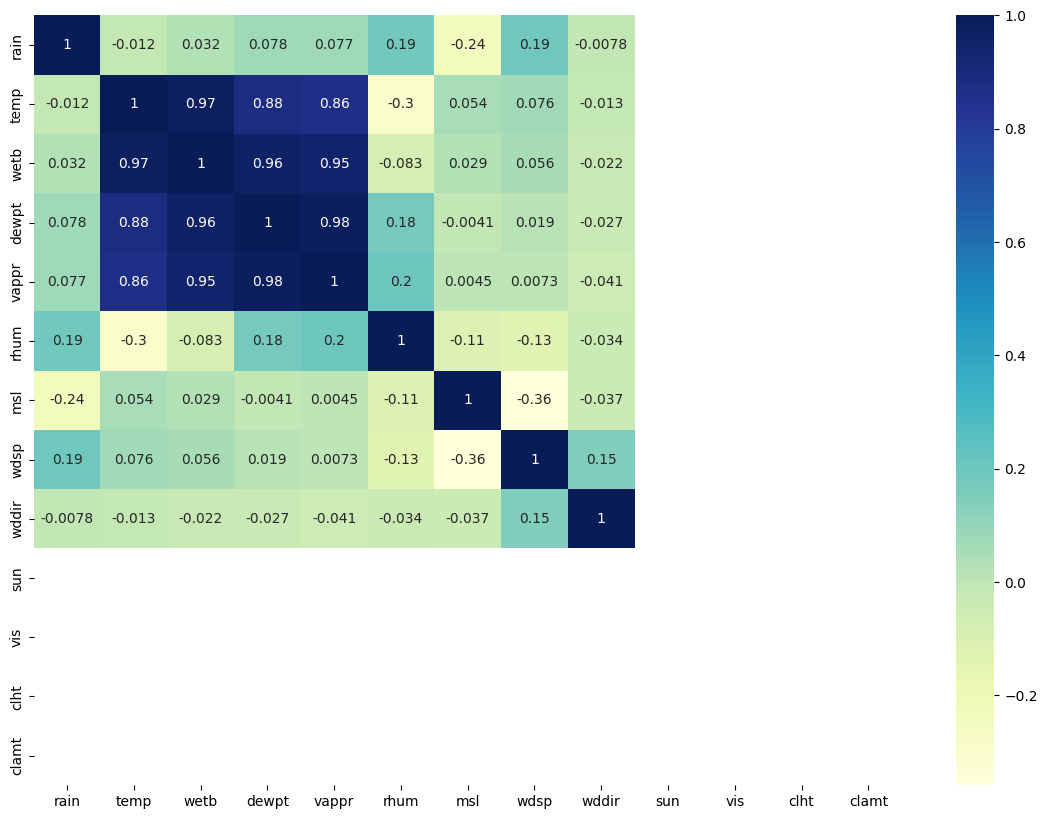

In [30]:
plt.figure(figsize=(14,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(),annot=True,cmap='YlGnBu')

In [31]:
import folium
#import folium.map
#df=df.dropna()
df_uniq=df.drop_duplicates(['latitude','longitude'])

Ireland_map= folium.Map(location=[53.5,-8],zoom_start=6)

for _,row in df_uniq.iterrows():
    folium.Marker([row['latitude'],row['longitude']], popup=row['station']).add_to(Ireland_map)

Ireland_map

In [32]:
df.head(2)

,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
0,2011-07-18 13:00:00,Galway,ATHENRY,53.289,-8.786,0.3,13.6,11.8,10.1,12.3,79.0,999.1,11.0,300.0,NaN,NaN,NaN,NaN
1,2011-09-05 14:00:00,Galway,ATHENRY,53.289,-8.786,1.4,11.9,11.2,10.4,12.7,90.0,1006.6,11.0,220.0,NaN,NaN,NaN,NaN


In [ ]:
# create a new column for month
type(df['date'][3])
df=df.reset_index()
df['month']=df['date'].dt.month
df['year'] = df['date'].dt.year

#df['year'] = df['year'].astype('category')
#df['month'] = df['month'].astype('category')

In [ ]:
#labeling the counties and stations and 
from sklearn.preprocessing import LabelEncoder
df=df.drop(['sun','vis','clht','clamt'],axis=1)
lb=LabelEncoder()
to_label=['county','station']
for col in to_label:
    df[col]=lb.fit_transform(df[col])
df.head(2)

,index,date,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month,year
0,0,2011-07-18 13:00:00,6,0,53.289,-8.786,0.3,13.6,11.8,10.1,12.3,79.0,999.1,11.0,300.0,7,2011
1,1,2011-09-05 14:00:00,6,0,53.289,-8.786,1.4,11.9,11.2,10.4,12.7,90.0,1006.6,11.0,220.0,9,2011


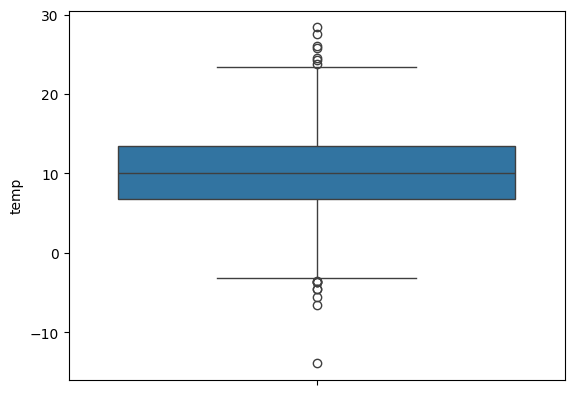

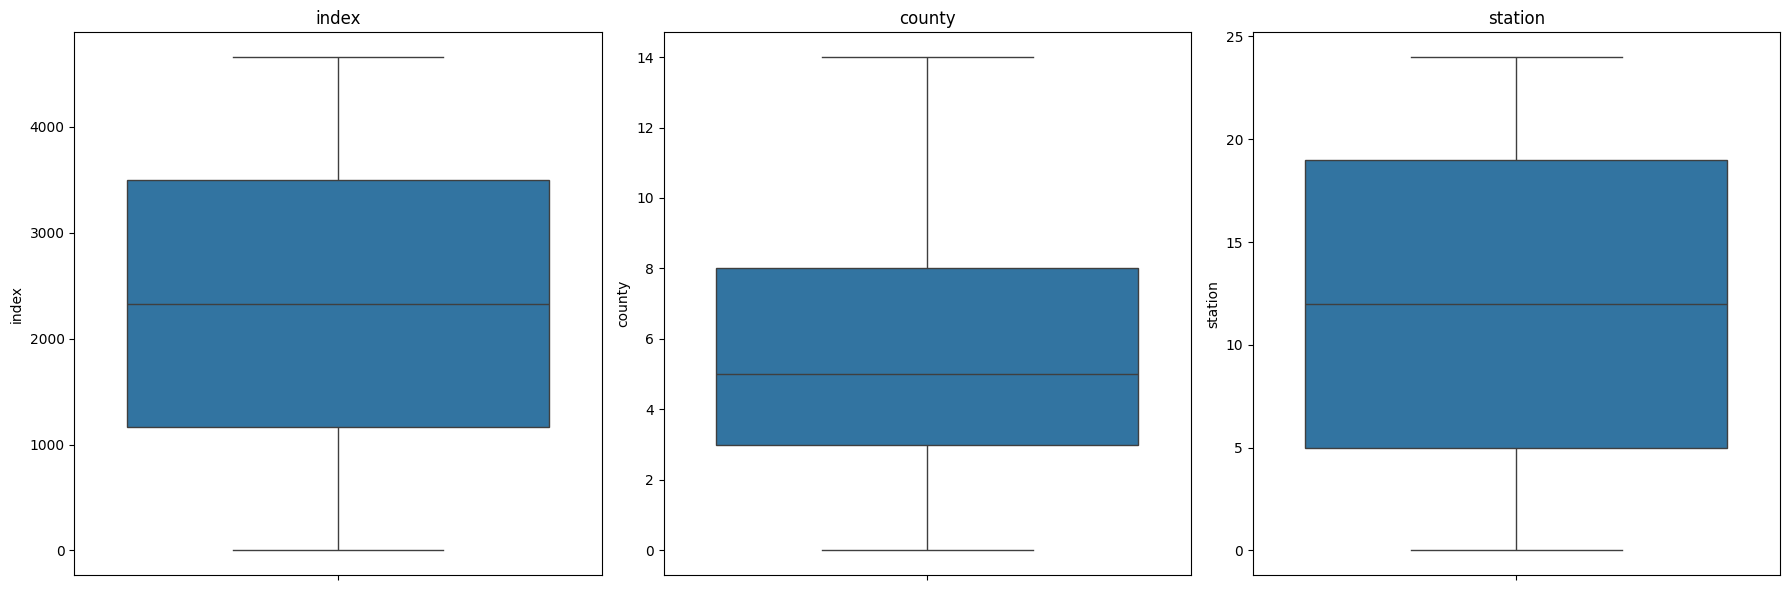

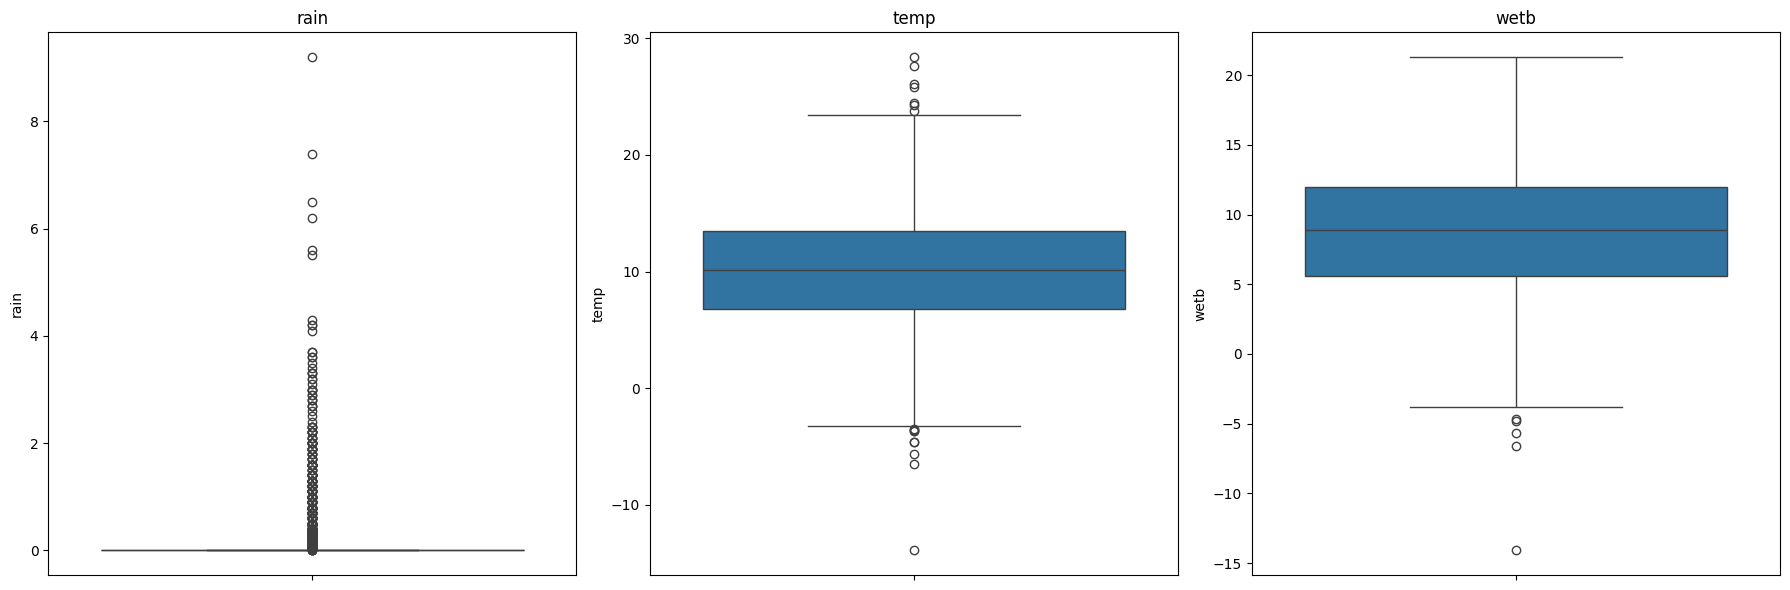

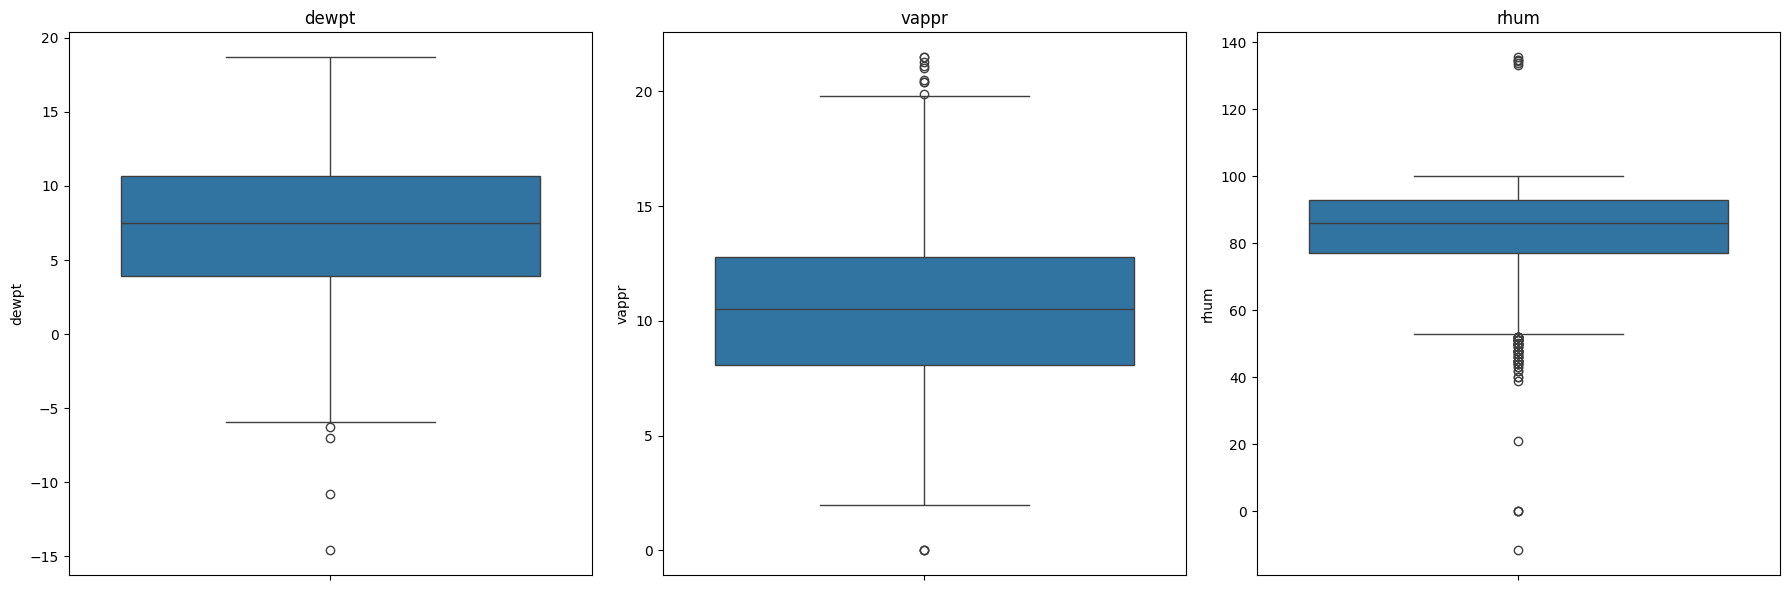

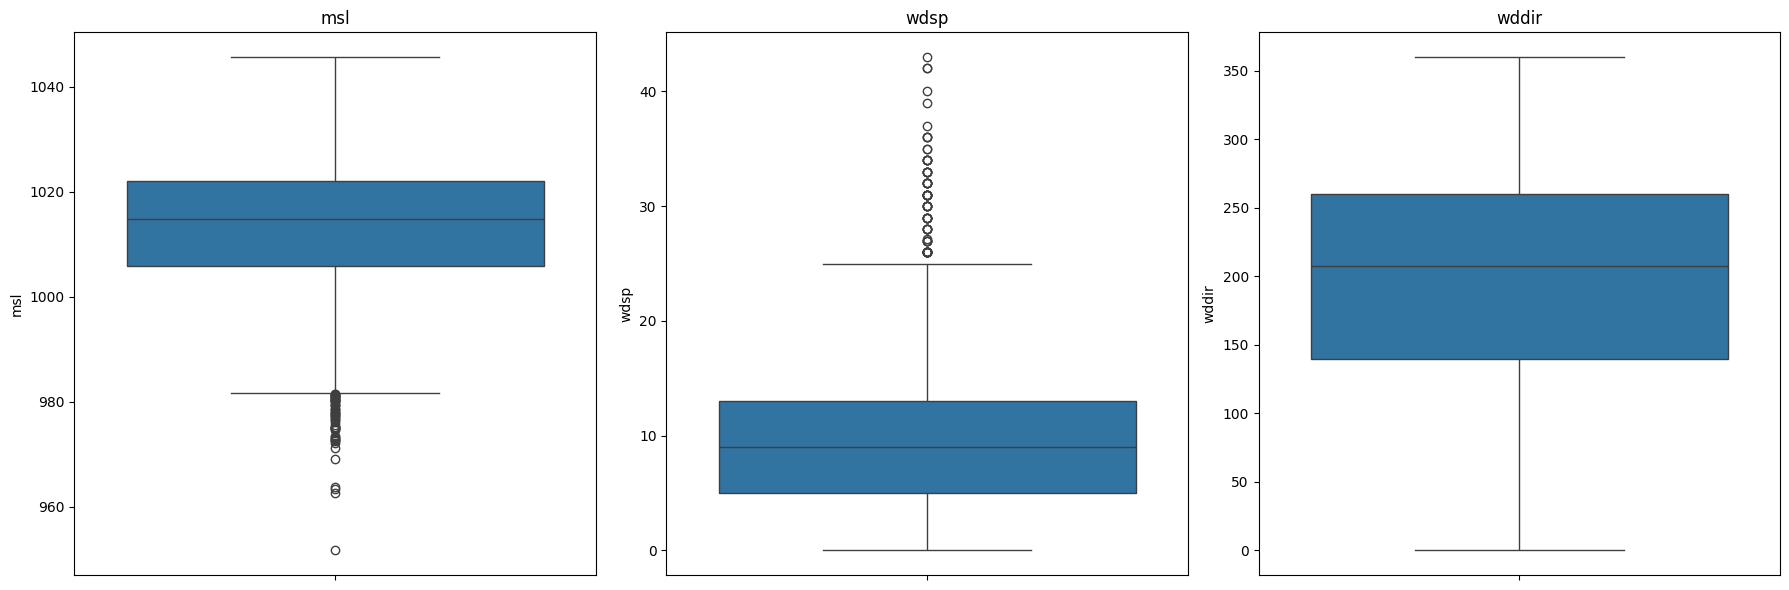

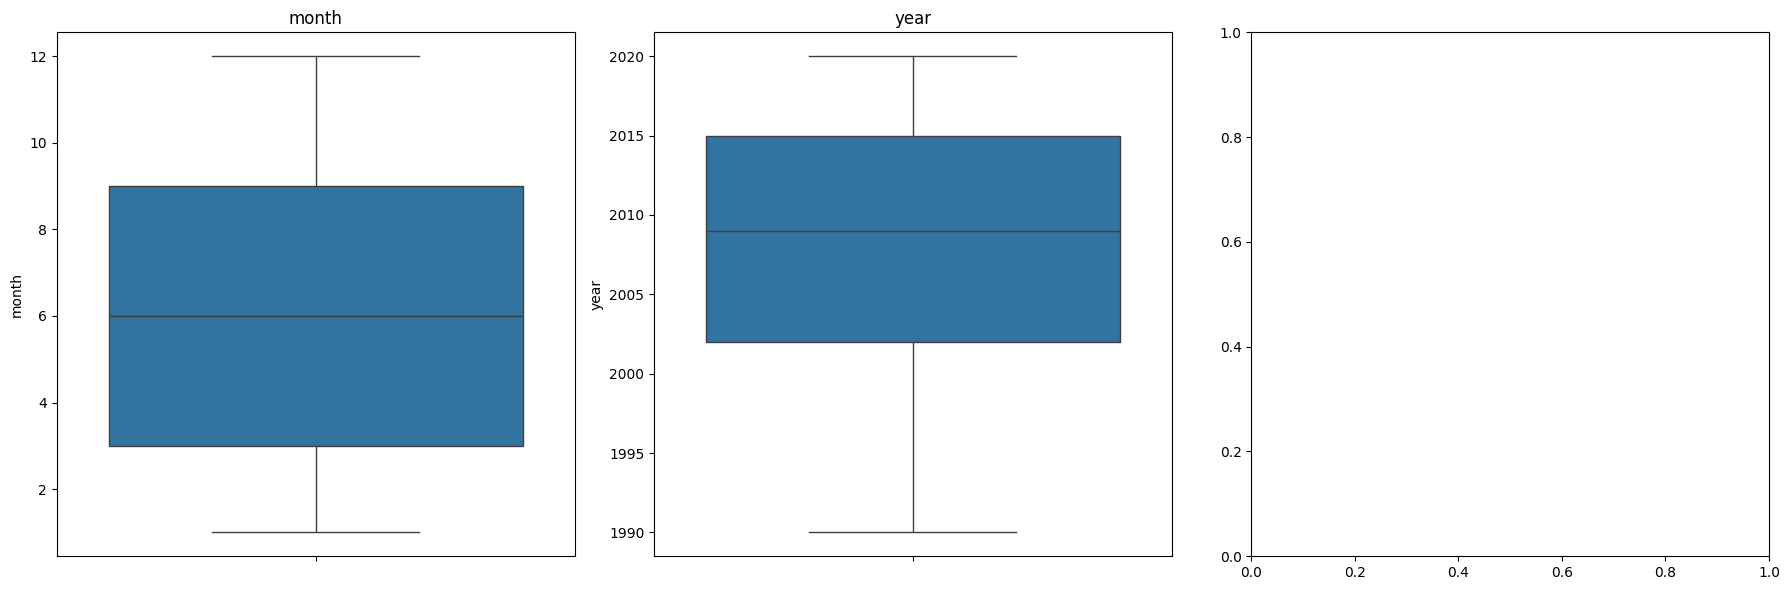

In [35]:
df.loc[df['rain']<0,'rain']=0
df[df['rain']<0]

#np.log(df['rain']+1).plot(kind='hist',bins=10,figsize=(12,6),title='Rain distribution')
plt.show()
sns.boxplot(df['temp'])


def plots(df):
    numeric_columns = df.select_dtypes(include=['number']).columns
    num_plots = len(numeric_columns)
    
    for i in range(0, num_plots, 3):
        fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18,6))
        
        for j, ax in enumerate(axes):
            if i+j < num_plots:
                sns.boxplot(df[numeric_columns[i+j]], ax=ax)
                ax.set_title(numeric_columns[i+j])
        
        plt.tight_layout()
        plt.show()
plots(df)      

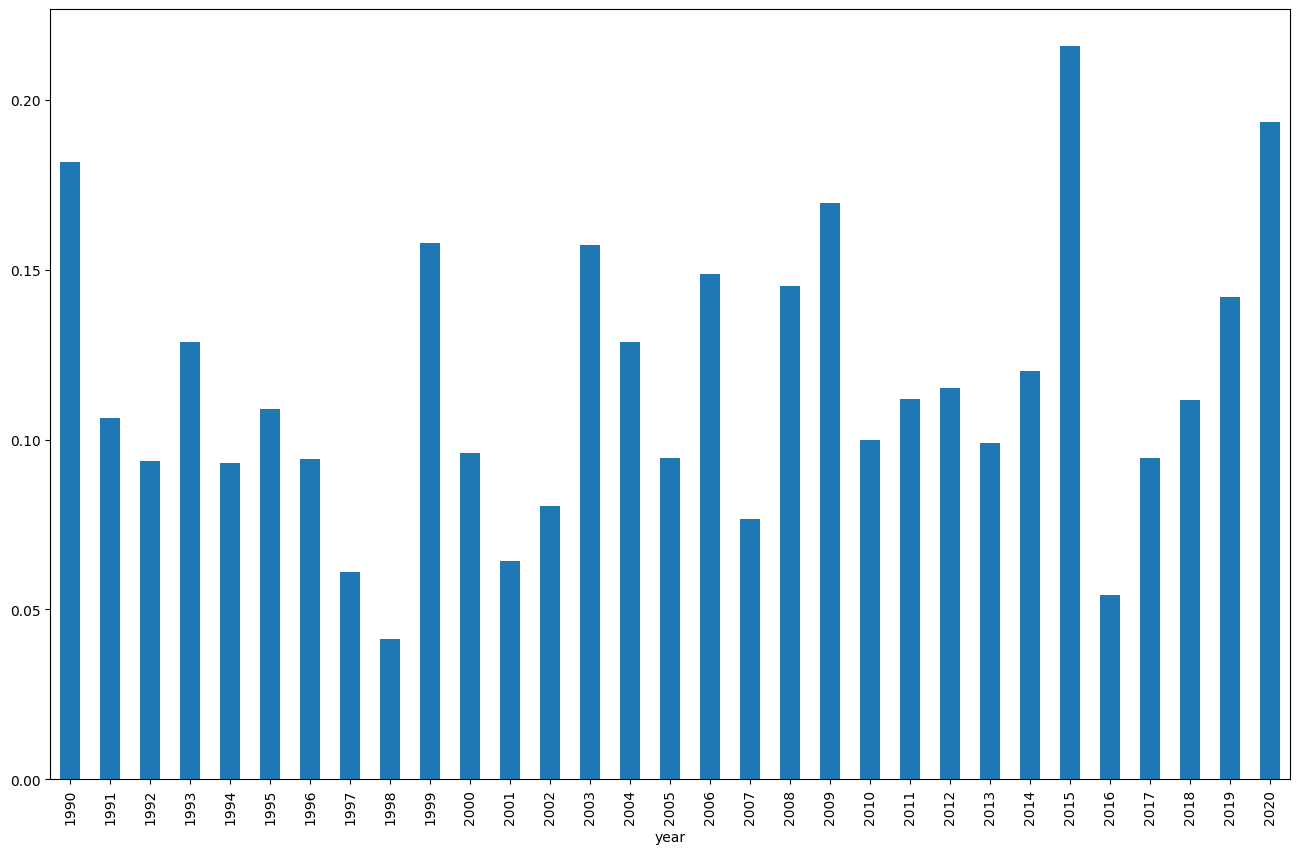

<Axes: xlabel='year'>

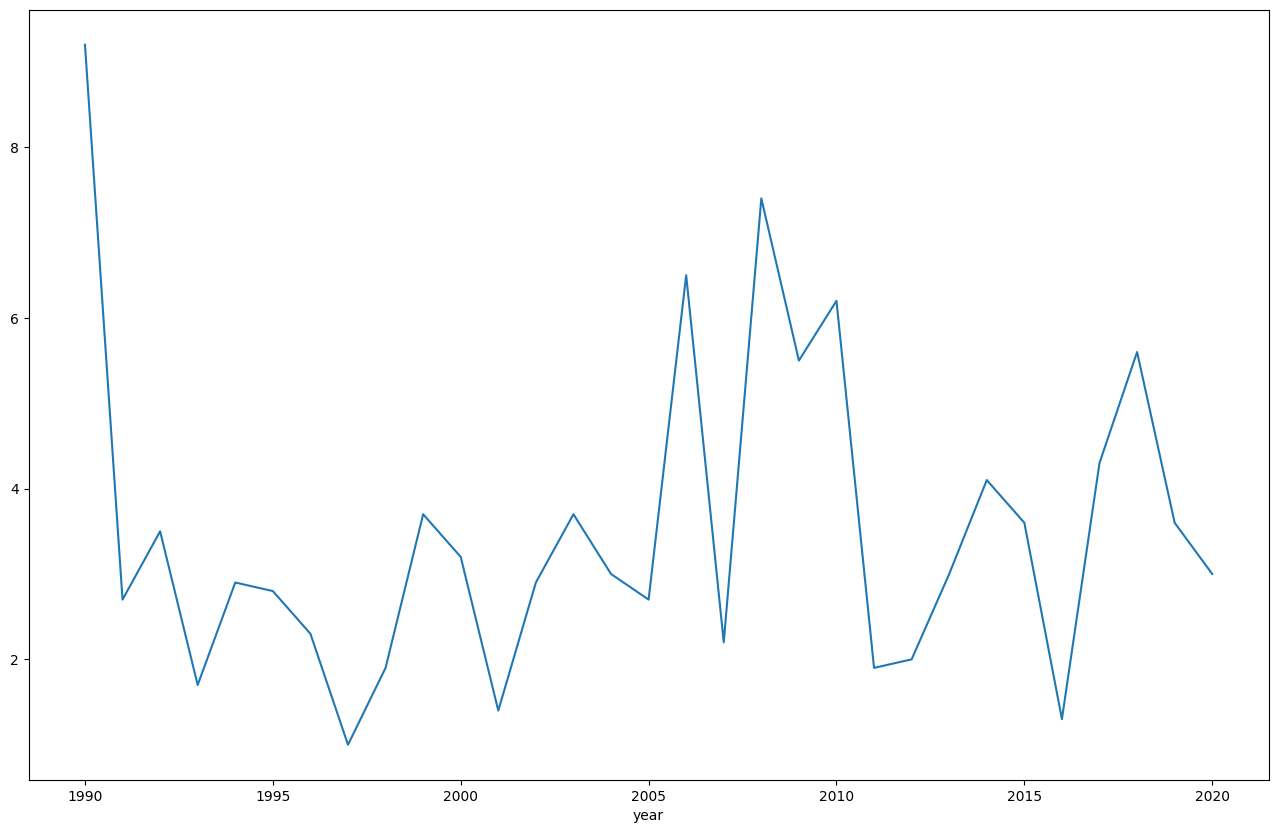

In [36]:
df.groupby(['year'])['rain'].mean().plot(kind='bar',figsize=(16,10))
plt.show()
df.groupby(['year'])['rain'].max().plot(kind='line',figsize=(16,10))   

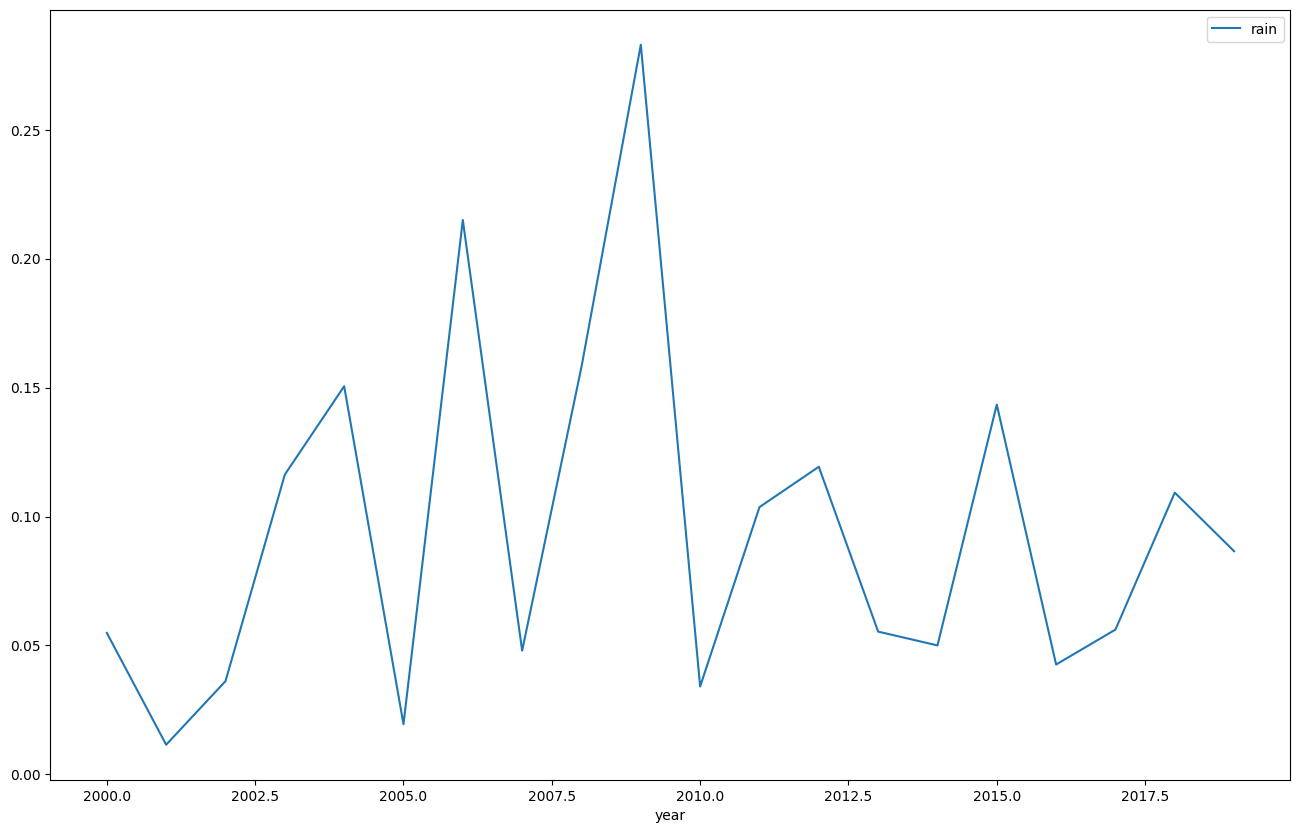

In [37]:
df['temp'].describe()
# Define a function to map from month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Create a new column 'season' by applying the function to the 'month' column
df['season'] = df['month'].apply(month_to_season)

# Count the number of each season
season_counts = df['season'].value_counts()
#df.groupby('season').aggregate({'rain': 'mean','temp':'mean','wetb':'mean'})#.plot(kind='bar',figsize=(16,10))

#df[df['year']>2000].groupby(['year','season']).aggregate({'rain': 'mean','temp':'mean','wetb':'mean'}).plot(kind='line',figsize=(16,10))
df_rain_summer=df[(df['year']>=2000) & (df['season']=='Summer')].groupby(['year']).aggregate({'rain': 'mean'}).plot(kind='line',figsize=(16,10))
#df_rain_summer.plot(kind='line',figsize=(16,10))

#sns.regplot(df_rain_summer.reset_index(),x='year',y='rain',scatter=False, color='red')

# Classification


In [38]:
df.head(2)
df=df.set_index('date').drop(['index'],axis=1)


In [39]:
en=LabelEncoder()
df['season']=en.fit_transform(df['season'])
df_class=df.drop(['latitude','longitude','year','season',],axis=1)
y=np.where(df_class['rain']!=0,1,0)

df_class.head(2)

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month
date,,,,,,,,,,,,
2011-07-18 13:00:00,6,0,0.3,13.6,11.8,10.1,12.3,79.0,999.1,11.0,300.0,7
2011-09-05 14:00:00,6,0,1.4,11.9,11.2,10.4,12.7,90.0,1006.6,11.0,220.0,9


In [40]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

norm=MinMaxScaler()
df_norm=norm.fit_transform(df_class)
X=df_norm
#y=df['rained']
X=pd.DataFrame(df_norm,columns=df_class.columns).values
#X=df.drop('season',axis=1).values


In [41]:
print(X.shape)

(4660, 12)


In [42]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
X_train,X_test,y_train, y_test=train_test_split(X,y,test_size=.3,random_state=1)

svc=SVC(kernel='rbf',gamma=.5)

rd=RandomizedSearchCV(svc,param_distributions={'C':[1,10,100,1000],'gamma':[1,.1,.01,.001,.0001]},cv=5,n_iter=10)
#svc.fit(X_train,y_train)
#y_pred=svc.predict(X_test)
#print("the Train Score :" ,svc.score(X_train,y_train))
#print("the Test Score :" ,svc.score(X_test,y_test))
rd.fit(X_train,y_train)
y_pred=rd.predict(X_test)


In [43]:

print("the Train Score :" ,rd.score(X_train,y_train))
print("the Test Score :" ,rd.score(X_test,y_test))
print("#"*20,"best_params_","#"*20)
print(rd.best_params_)

print("#"*20,"best_scores","#"*20)
print(rd.best_score_)

print("#"*20,"best_estimator_","#"*20)
print(rd.best_estimator_)

print("#"*20,"best_index-","#"*20)
print(rd.best_index_)

#print("#"*20,"best_result_","#"*20)
#print(rd.cv_results_)

print("#"*20,"best_splits_","#"*20)
print(rd.n_splits_)

print("#"*20,"best_refit_time_","#"*20)
print(rd.refit_time_)

print("#"*20,"best_scoring_","#"*20)
print(rd.scoring)

print("#"*20,"best_verbose_","#"*20)
print(rd.verbose)

print("#"*20,"error_score_","#"*20)
print(rd.error_score)


the Train Score : 0.9984671980380135
the Test Score : 0.9985693848354793
#################### best_params_ ####################
{'gamma': 1, 'C': 1000}
#################### best_scores ####################
0.9932552917633574
#################### best_estimator_ ####################
SVC(C=1000, gamma=1)
#################### best_index- ####################
7
#################### best_splits_ ####################
5
#################### best_refit_time_ ####################
0.7247722148895264
#################### best_scoring_ ####################
None
#################### best_verbose_ ####################
0
#################### error_score_ ####################
nan


In [44]:
%%time
svc=SVC(kernel='rbf',gamma=.1,C=1000)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
print("the Train Score :" ,svc.score(X_train,y_train))
print("the Test Score :" ,svc.score(X_test,y_test))


the Train Score : 0.996934396076027
the Test Score : 0.9985693848354793
CPU times: user 4.96 s, sys: 14.7 ms, total: 4.97 s
Wall time: 4.99 s


In [45]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1113
           1       1.00      0.99      1.00       285

    accuracy                           1.00      1398
   macro avg       1.00      1.00      1.00      1398
weighted avg       1.00      1.00      1.00      1398

[[1113    0]
 [   2  283]]


So now we can classify the weather. if have specific weather conditions then we can forcast if it's raining in this weather or not.
we consider a day with these conditions :
county        3.0
station      23.0
rain          0.1
temp         14.4
wetb         14.2
dewpt        14.1
vappr        16.0
rhum         97.0
msl        1017.8
wdsp         19.0
wddir       240.0
month         7.0



In [46]:
df_class[df_class['rain']>.5]

,county,station,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,month
date,,,,,,,,,,,,
2011-09-05 14:00:00,6,0,1.4,11.9,11.2,10.4,12.7,90.0,1006.6,11.0,220.0,9
2014-03-09 01:00:00,6,0,0.9,6.6,6.0,5.2,8.9,91.0,1012.2,5.0,260.0,3
2014-12-08 01:00:00,6,0,0.9,1.6,1.3,0.8,6.5,94.0,1018.4,4.0,240.0,12
2017-07-26 03:00:00,6,0,0.8,16.6,16.1,15.7,17.8,94.0,999.9,9.0,180.0,7
2019-01-29 18:00:00,6,0,1.0,0.5,0.2,-0.1,6.1,95.0,998.3,5.0,310.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2013-02-13 16:00:00,7,24,1.4,10.9,10.7,10.5,12.7,97.0,1008.3,20.0,230.0,2
2014-02-24 14:00:00,7,24,3.0,6.2,5.6,4.8,8.6,90.0,986.7,15.0,170.0,2
2018-07-26 06:00:00,7,24,5.6,17.1,16.6,16.3,18.5,94.0,1007.6,13.0,170.0,7


In [60]:
#value=df_class.loc['2018-07-26 06:00:00']
value=[0.5       , 1.        , 0.60869565, 0.73286052, 0.86723164,
        0.92792793, 0.86046512, 0.71749594, 0.59468085, 0.30232558,
        0.47222222, 0.54545455]
#value=norm.transform([value])
value

[0.5,
 1.0,
 0.60869565,
 0.73286052,
 0.86723164,
 0.92792793,
 0.86046512,
 0.71749594,
 0.59468085,
 0.30232558,
 0.47222222,
 0.54545455]

In [61]:
prediction=svc.predict([value])
print(prediction)


[1]


In [62]:
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100



/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


,county,station,latitude,longitude,rain,temp,wetb,dewpt,vappr,rhum,msl,wdsp,wddir,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,


In [ ]:
# chunk_size = 1000
# chunks=[]
# for chunk in  pd.read_csv('weth.csv',chunksize=chunk_size,parse_dates=['date'],index_col='date'):
#     chunks.append(chunk.sample(frac=0.001 ))
# weth=pd.concat(chunks, axis=0)

# weth.head(2)
#"6:54": frac=0.0001

In [67]:
weth=pd.read_csv('weth.csv',parse_dates=['date'],index_col='date')
#7:37"

In [69]:
#weth.sort_index(inplace=True)
data=weth[['temp']].sample(frac=0.001)
data.index = pd.to_datetime(data.index)
data.sort_index(inplace=True)
#data.sort_index()
data.head(5)
#data.tail(5)


,temp
date,
1990-01-01,7.8
1990-01-01,9.2
1990-01-01,9.5
1990-01-01,7.6
1990-01-01,9.0


<Axes: title={'center': 'Rain in Ireland'}, xlabel='date'>

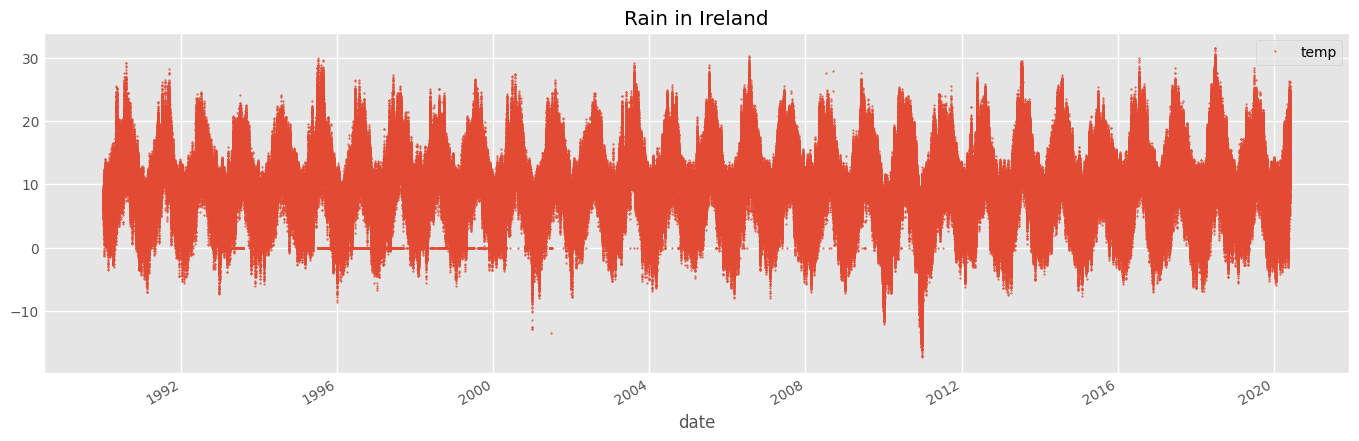

In [70]:

color_pallete=sns.color_palette()
# Convert all columns to numeric
data = data.apply(pd.to_numeric, errors='coerce')

# Now try plotting again
data.plot(style='.', figsize=(15,5), ms=1, color=color_pallete[0], title='Rain in Ireland')
#data.plot(style='.',figsize=(15,5),ms=1, color=color_pallete[0],title='Rain in Ireland')

In [72]:
from pandas.api.types import CategoricalDtype
import datetime
cat_type_months=CategoricalDtype(categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'],ordered=True)
cat_type_days=CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],ordered=True)

def create_features(df,label=None):
    """Create time series features from datetime index

    
    """
    df=df.copy()
    df['date']=df.index
    df['hour']=df['date'].dt.hour
    df['dayofweek']=df['date'].dt.dayofweek
    df['weekday']=df['date'].dt.day_name()
    df['weekday']=df['weekday'].astype(cat_type_days)
    
    df['quarter']=df['date'].dt.quarter
    df['month']=df['date'].dt.month
    df['year']=df['date'].dt.year
    df['dayofyear']=df['date'].dt.dayofyear
    df['dayofmonth']=df['date'].dt.day
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['date_offset']=(df.date.dt.month*100+df.date.dt.day-320)%1300
    df['season'] = pd.cut(df['date_offset'], [0, 300, 602, 900, 1300], labels=['Spring', 'Summer', 'Fall','Winter'])
    X=df[['hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear','weekday','season']]
    
    if label:
        y=df[label]
        return X,y
    return X


X,y=create_features(data,label='temp')
features_target=pd.concat([X,y],axis=1)
features_target.head(2)

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,weekday,season,temp
date,,,,,,,,,,,
1990-01-01,0,0,1,1,1990,1,1,1,Monday,Winter,7.8
1990-01-01,0,0,1,1,1990,1,1,1,Monday,Winter,9.2


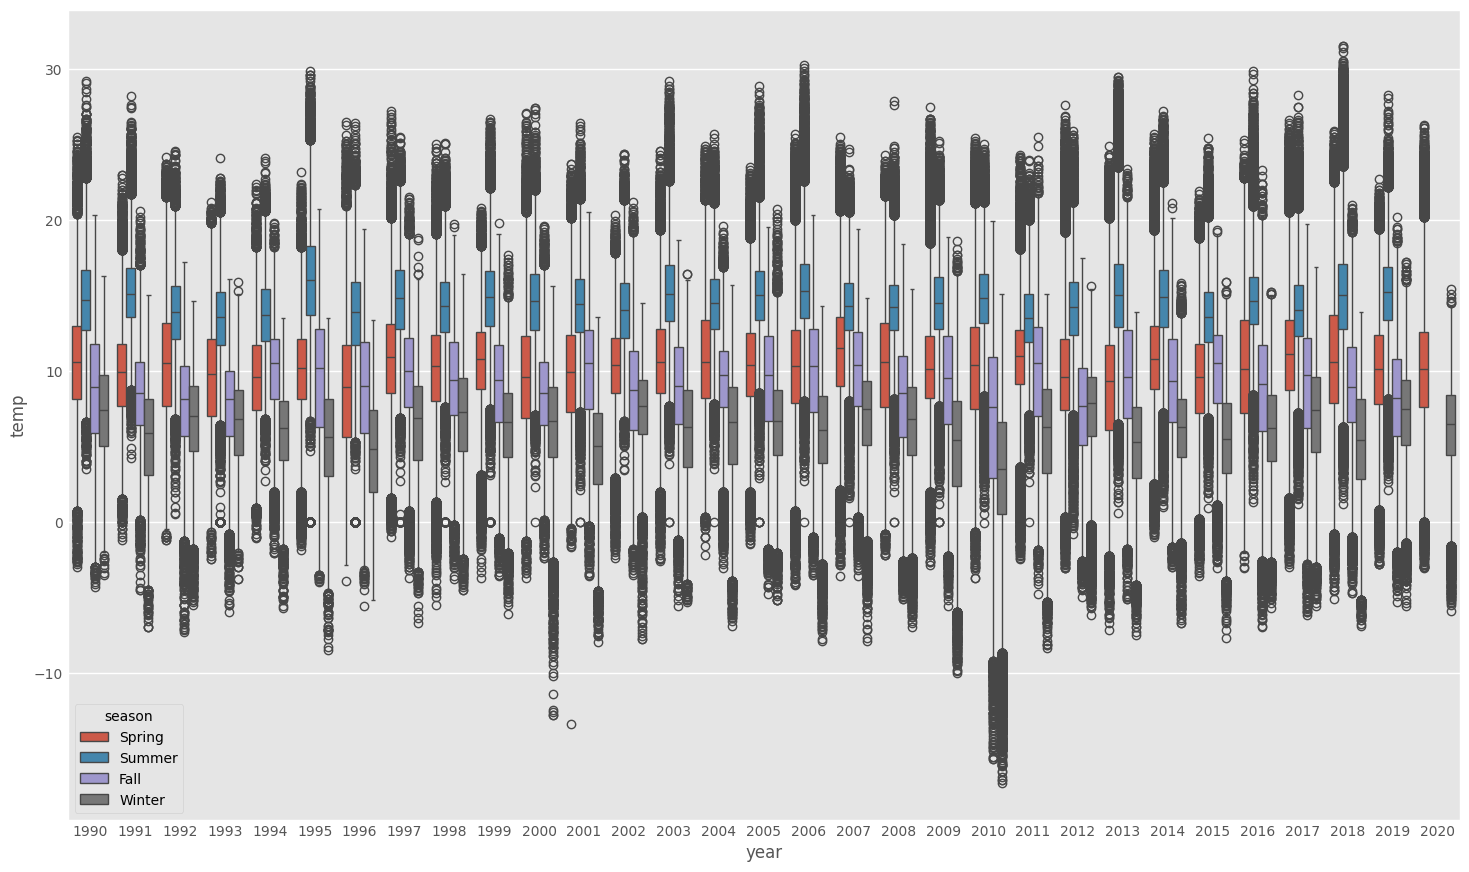

In [75]:
fig,ax=plt.subplots(figsize=(16,10))
sns.boxplot(data=features_target.dropna(),x='year',y='temp',ax=ax,hue='season',linewidth=1)
plt.show()
sns.boxplot(data=features_target.dropna(),x='year',y='temp',ax=ax,linewidth=1)
plt.show()


## Train Test Split

<Axes: title={'center': 'Temperature'}, xlabel='date'>

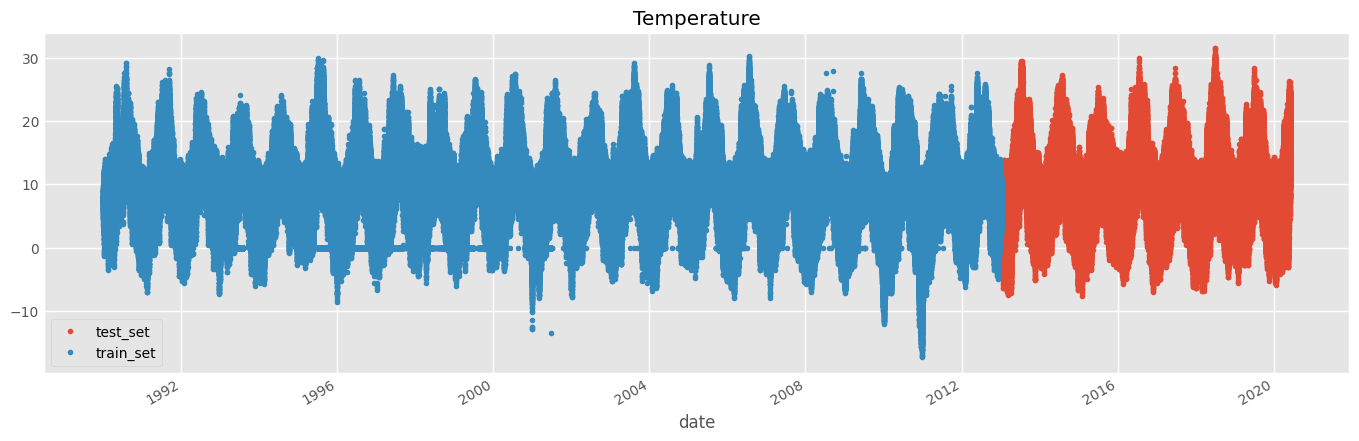

In [74]:
split_date='01-Jan-2013'
data_train=data.loc[data.index<split_date].copy()
data_test=data.loc[data.index>=split_date].copy()

data_test.rename(columns={'temp':'test_set'}).join(data_train.rename(columns={'temp':'train_set'}),how='outer').plot(figsize=(15,5),title='Temperature',style='.')

## Facebook Prophet Model

- date time column : ds
- targer: y


In [76]:
data_train_proph=data_train.reset_index().rename(columns={'date':'ds','temp':'y'})
data_train_proph.head(2)

,ds,y
0,1990-01-01,7.8
1,1990-01-01,9.2


In [77]:
%%time
model=Prophet()
model.fit(data_train_proph)
# Time : 36min:3s

15:55:35 - cmdstanpy - INFO - Chain [1] start processing
16:27:10 - cmdstanpy - INFO - Chain [1] done processing


CPU times: user 4min 16s, sys: 9.48 s, total: 4min 25s
Wall time: 36min 3s


In [78]:
data_test_proph=data_test.reset_index().rename(columns={'date':'ds','temp':'y'})
data_test_predicted=model.predict(data_test_proph)
data_test_predicted.head(2)
# time : 25:37

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,10.074377,1.117265,8.706660,10.074377,10.074377,-5.41564,-5.41564,-5.41564,-1.146679,...,0.002777,0.002777,0.002777,-4.271737,-4.271737,-4.271737,0.0,0.0,0.0,4.658736
1,2013-01-01,10.074377,0.870791,8.428482,10.074377,10.074377,-5.41564,-5.41564,-5.41564,-1.146679,...,0.002777,0.002777,0.002777,-4.271737,-4.271737,-4.271737,0.0,0.0,0.0,4.658736


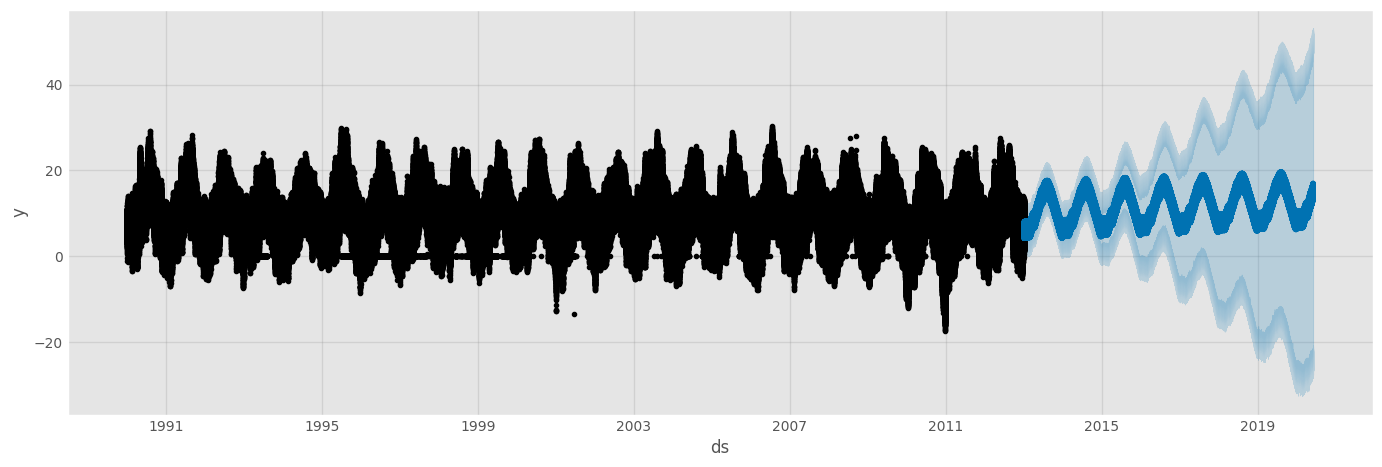

In [79]:
fig,ax=plt.subplots(figsize=(15,5))
fig=model.plot(data_test_predicted,ax=ax)

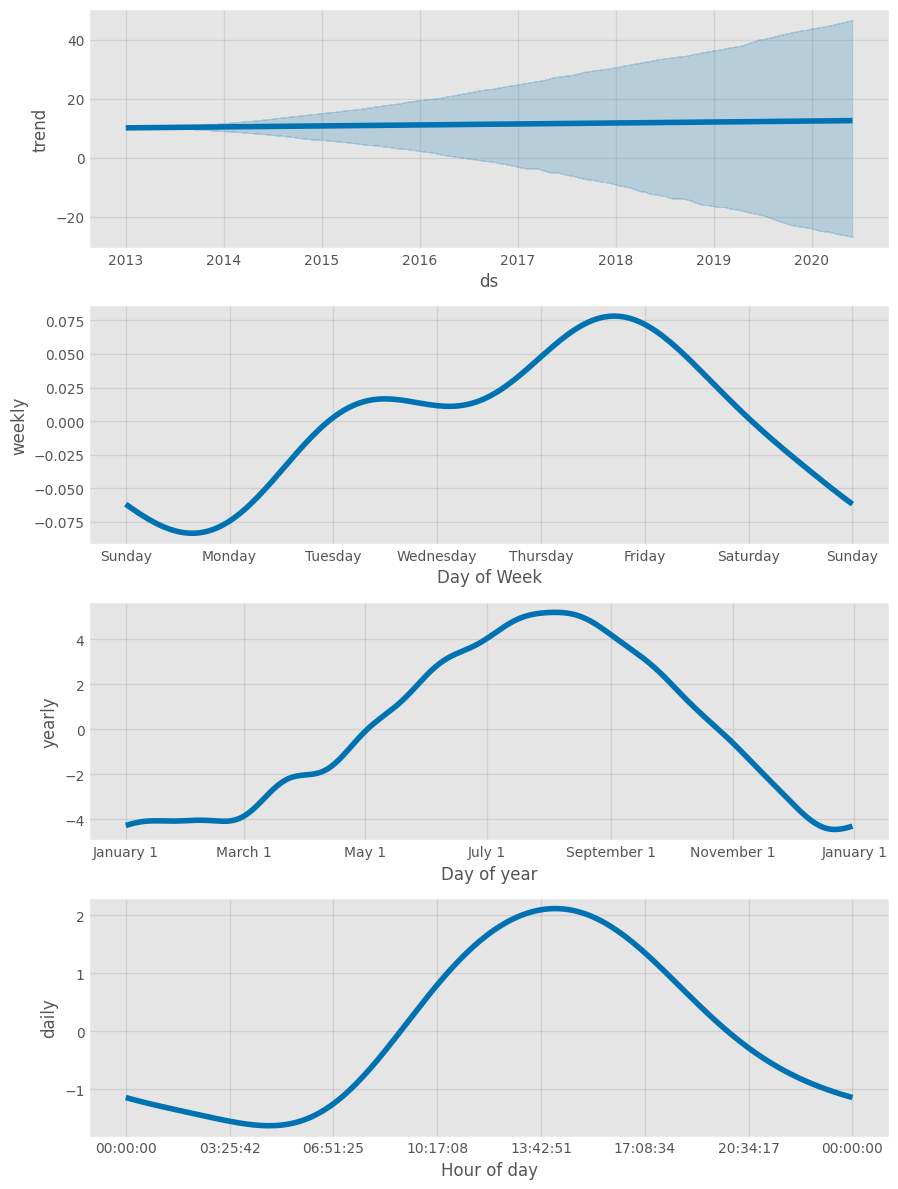

In [80]:
fig=model.plot_components(data_test_predicted)

## Compare the Forecasted with the Actual Values to Comapre

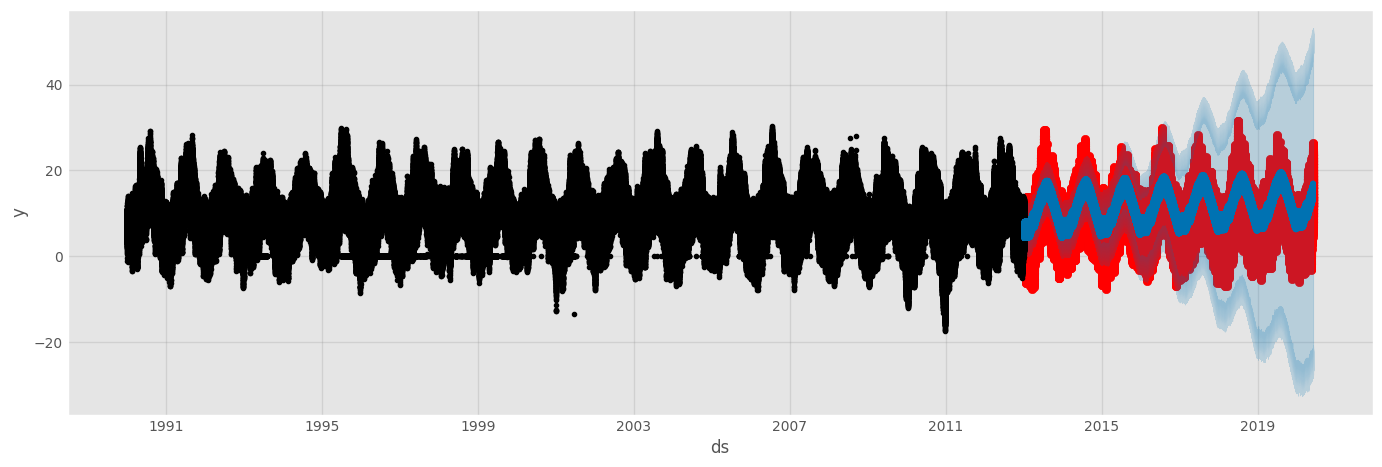

In [81]:
fig,ax= plt.subplots(figsize=(15,5))
ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

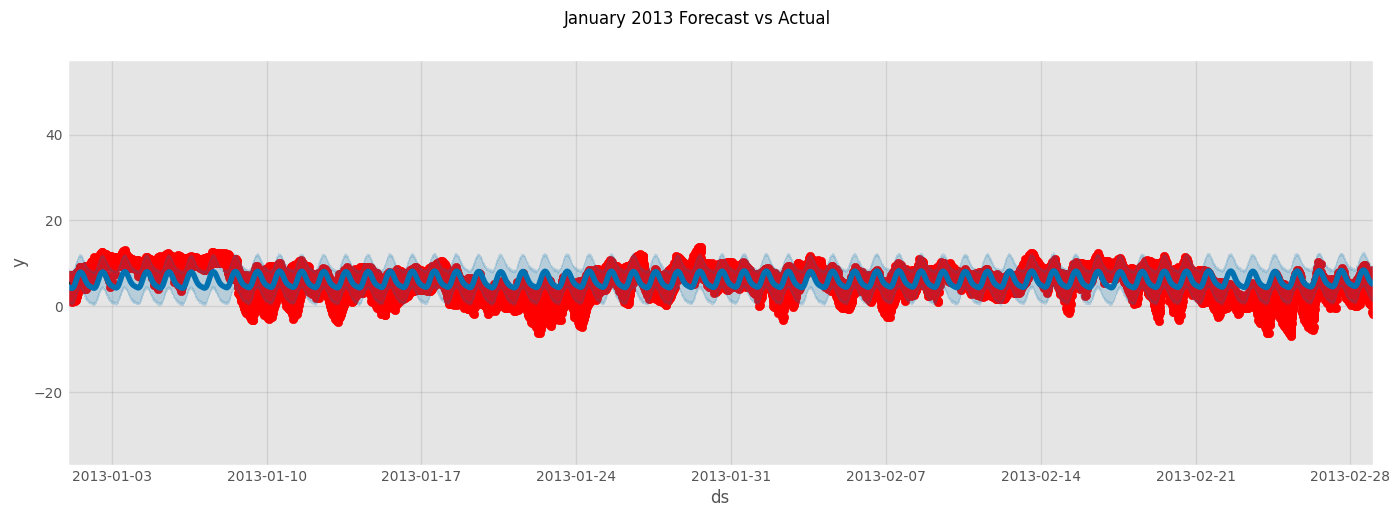

In [82]:
from datetime import datetime
fig,ax= plt.subplots(figsize=(15,5))

ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

lower_bound = datetime.strptime('01-Jan-2013', '%d-%b-%Y')
upper_bound = datetime.strptime('01-Mar-2013', '%d-%b-%Y')

ax.set_xbound(lower=lower_bound,upper=upper_bound)
plot= plt.suptitle('January 2013 Forecast vs Actual')

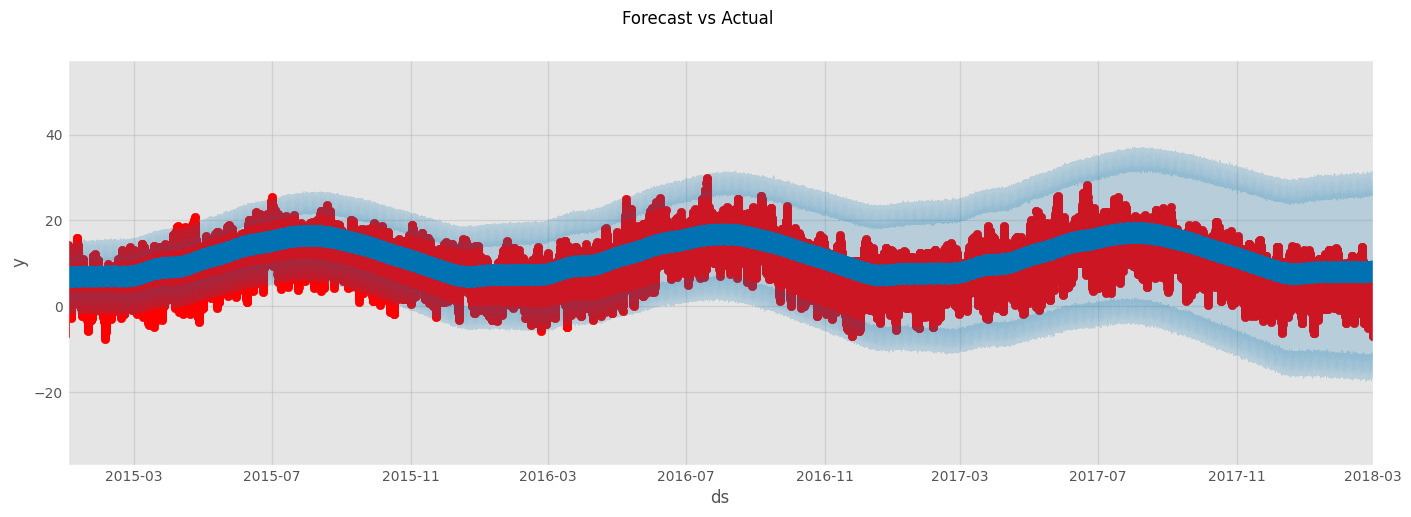

In [83]:
fig,ax= plt.subplots(figsize=(15,5))

ax.scatter(data_test.index,data_test['temp'],color='r',label='True')
fig=model.plot(data_test_predicted,ax=ax)

lower_bound = datetime.strptime('01-Jan-2015', '%d-%b-%Y')
upper_bound = datetime.strptime('01-Mar-2018', '%d-%b-%Y')

ax.set_xbound(lower=lower_bound,upper=upper_bound)
plot= plt.suptitle('Forecast vs Actual')

## Evaluate the model how good it is


In [85]:
#data_test.dropna(inplace=True)
np.sqrt(mean_squared_error(data_test['temp'],data_test_predicted['yhat']))

ValueError: Found input variables with inconsistent numbers of samples: [1624302, 1624825]

In [92]:
mean_absolute_error(data_test['temp'],data_test_predicted['yhat'])

ValueError: Found input variables with inconsistent numbers of samples: [1624302, 1624825]

In [93]:
mean_absolute_percentage_error(data_test['temp'],data_test_predicted['yhat'])

ValueError: operands could not be broadcast together with shapes (1624302,) (1624825,) 

## Future Forcasting

In [94]:
future=model.make_future_dataframe(periods=12*35 ,freq='M',include_history=False)

forecast=model.predict(future)

forecast.head(2)

AttributeError: 'ARIMA' object has no attribute 'make_future_dataframe'

In [ ]:
fig = model.plot(forecast)

## ARIMA


In [86]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [87]:
weth.dropna(inplace=True)
arima=weth.sample(frac=0.001)

To use the ARIMA model, first I need to ensure that my data is stationary, as ARIMA requires the data to be stationary. Stationarity means that the statistical properties of a process generating a time series do not change over time.

I have to check  **Augmented Dickey-Fuller test** with adfuller()


In [88]:
test_result=adfuller(arima['temp'])
print(f'ADF Statistic: {test_result[0]}')
print(f'p-value: {test_result[1]}')

ADF Statistic: -46.55679844597197
p-value: 0.0


If the p-value is greater than 0.5 the data needs to be stationary. 

In [ ]:
# to make data stationary
# df['temp_diff']=df['temp']-df['temp'].shift(1)
# df.dropna(inplace=True)

The order parameter (p,d,q) represents the order of the AR term (p), the number of differencing needed to make the time series stationary (d), and the order of the MA term (q).

In [89]:
arima_model=ARIMA(df['temp'],order=(5,1,0))
model_fit=model.fit()

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  

In [96]:
forecast = model_fit.forecast(steps=25*12)  # forecast for the next 25 years (assuming the data is monthly)

/Users/Mehr/Desktop/Python/me/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [97]:
forecast

4660    8.207984
4661    8.718258
4662    8.430718
4663    8.606901
4664    8.453187
          ...   
4955    8.113009
4956    8.113009
4957    8.113009
4958    8.113009
4959    8.113009
Name: predicted_mean, Length: 300, dtype: float64

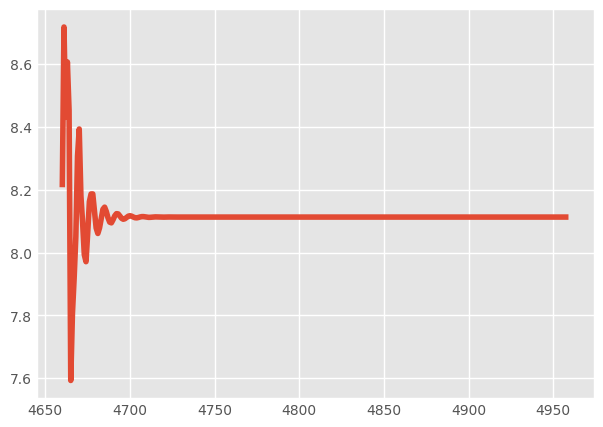

In [99]:
plt.plot(forecast)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import tensorflow as tf
import mlflow.keras 
# Load data
weth = pd.read_csv('weth001.csv', parse_dates=['date'])

mlflow.keras.autolog()
# Stratified sampling based on year
#data = weth.groupby(weth['date'].dt.year, group_keys=False).apply(lambda x: x.sample(frac=0.01))

# Data preprocessing
#df = data.copy()
df=weth.copy()
df = df.drop(columns=['county', 'station', 'latitude', 'longitude', 'sun', 'vis', 'clht', 'clamt'], axis=1)
df.replace(' ', pd.NA, inplace=True)
df.dropna(inplace=True)
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.sort_index(inplace=True)

dtype_map = {'rain': float, 'temp': float, 'wetb': float, 'dewpt': float, 'vappr': float, 'rhum': float, 'msl': float, 'wdsp': float, 'wddir': float}
df = df.apply(pd.to_numeric, errors='coerce')
df = df.astype(dtype_map)

df_temp = df['temp'].values.astype('float32')

# Check for NaNs in the temperature data
if np.isnan(df_temp).any():
    raise ValueError("NaNs found in temperature data before scaling")

# Scaling
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(df_temp.reshape(-1, 1))

# Check for NaNs after scaling
if np.isnan(dataset).any():
    raise ValueError("NaNs found in scaled temperature data")

# Splitting data into training and testing
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

# Function to create dataset
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        dataX.append(dataset[i:(i + look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

with mlflow.start_run():
# Build LSTM model
    model = Sequential()
    model.add(LSTM(4, input_shape=(1, look_back)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

    # Forecasting the next 10 years (365 * 20 days)
    future_steps = 365 * 10
    last_values = dataset[-look_back:]

    # Check for NaNs in the initial last_values
    if np.isnan(last_values).any():
        raise ValueError("NaNs found in initial last_values")

    predictions = []

    for i in range(future_steps):
        input_seq = last_values[-look_back:].reshape((1, 1, look_back))
        next_pred = model.predict(input_seq, verbose=0)
        predictions.append(next_pred[0, 0])
        last_values = np.append(last_values, next_pred)[-look_back:]

    # Check if predictions array is populated correctly
    print("First 10 predictions:", predictions[:10])  # Print first 10 predictions for verification

    # Inverse transform predictions
    predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

    # Calculate moving average
    window_size = 30  # 30 days moving average
    predictions_mean = pd.Series(predictions.flatten()).rolling(window=window_size, min_periods=1).mean()

    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(df.index, df_temp, label='Actual Temperature')
    future_dates = pd.date_range(df.index[-1], periods=future_steps + 1, inclusive='right')
    plt.plot(future_dates, predictions, label='Forecasted Temperature', color='red')
    plt.plot(future_dates, predictions_mean, label='Forecasted Mean Temperature (30-day MA)', color='green')
    plt.xlabel('Date')
    plt.ylabel('Temperature')
    plt.title('Temperature Forecast for the Next 20 Years with Mean Temperature Trend')
    plt.legend()
    plt.show()


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.4, random_state=42)
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier as gbc
from sklearn.feature_selection import SelectKBest,mutual_info_classif
from sklearn.metrics   import f1_score

gb=gbc(n_estimators=100)

f1_score_list=[]
for k in range(1,8):
    selector=SelectKBest(mutual_info_classif,k=k)
    selector.fit(X_train,y_train)
    
    sel_x_train=selector.transform(X_train)
    sel_x_test=selector.transform(X_test)
    gb.fit(sel_x_train,y_train)
    kbest=gb.predict(sel_x_test)
    f1_score_list.append(round(f1_score(y_test,kbest,average='weighted'),3))
    

fig,ax= plt.subplots()
x=np.arange(1,8)
y=f1_score_list
ax.bar(x,y)
ax.set_xlabel('Number of Features')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Score vs Number of Features')

for i , v in enumerate(y):
    plt.text(i+1,v+.01,str(v),color='blue',fontweight='bold')
plt.tight_layout()


plt.show()


selector=SelectKBest(mutual_info_classif,k=2)
selector.fit(X_train,y_train)
selector_mask=selector.get_support()
X_train.columns[selector_mask]  